<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/Hand_Gesture_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/test'

VGG NET BASED FEATURE SELECTION

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','AUC','Precision','Recall']
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 23600 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 204,
                                            class_mode = 'categorical')

Found 1920 images belonging to 4 classes.


In [ ]:
r=model.fit_generator(training_set,
samples_per_epoch = 2000,
                         nb_epoch = 5,
                         validation_data = test,
                         nb_val_samples = 1000)


NameError: ignored

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_generator,
  epochs=15,
  steps_per_epoch=8,
  validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
8/8 [==============================] - 104s 12s/step - loss: 1.1293 - accuracy: 0.6953 - auc: 0.8649 - precision: 0.7876 - recall: 0.6953 - val_loss: 0.2634 - val_accuracy: 0.9632 - val_auc: 0.9968 - val_precision: 0.9733 - val_recall: 0.8922
Epoch 2/15
8/8 [==============================] - 48s 6s/step - loss: 0.4113 - accuracy: 0.8203 - auc: 0.9737 - precision: 0.8772 - recall: 0.7812 - val_loss: 0.0243 - val_accuracy: 0.9975 - val_auc: 1.0000 - val_precision: 0.9975 - val_recall: 0.9926
Epoch 3/15
8/8 [==============================] - 50s 6s/step - loss: 0.0827 - accuracy: 0.9844 - auc: 0.9995 - precision: 0.9919 - recall: 0.9609 - val_loss: 0.0126 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/15
8/8 [==============================] - 44s 6s/step - loss: 0.0963 - accuracy: 0.9844 - auc: 0.9993 - precision: 0.9919 - recall: 0.9609 - val_loss: 0.0155 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recal

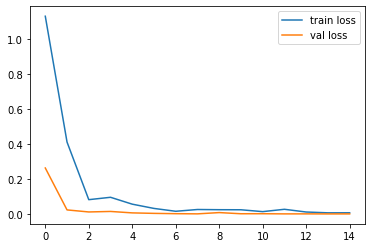

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

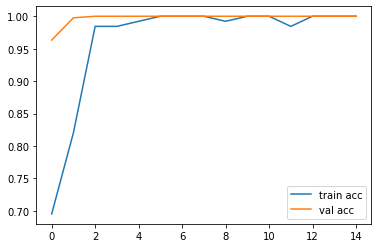

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_VGG16 HGR.h5')

In [ ]:

y_pred = model.predict(test_generator)
y_pred

array([[4.0655257e-05, 2.4253501e-05, 1.0509230e-04, 9.9982989e-01],
       [5.7465986e-05, 7.6749915e-05, 1.2580084e-03, 9.9860781e-01],
       [1.2647270e-04, 1.1832095e-04, 6.5627100e-04, 9.9909902e-01],
       ...,
       [2.6035437e-04, 3.4779846e-03, 7.6552259e-04, 9.9549615e-01],
       [2.5050159e-04, 5.4571037e-03, 6.1962561e-04, 9.9367273e-01],
       [2.7166310e-05, 1.5828704e-05, 5.3227035e-04, 9.9942470e-01]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_VGG16 HGR.h5')

In [ ]:
img_data

array([[[[-103.92332 , -116.76331 , -123.664314],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.919395, -116.75939 , -123.66039 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.92332 , -116.76331 , -123.664314],
         [-103.919395, -116.75939 , -123.66039 ]],

        [[-103.90763 , -116.74763 , -123.64863 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.91155 , -116.75155 , -123.65255 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.92332 , -116.76331 , -123.664314]],

        [[-103.915474, -116.75547 , -123.65647 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.919395, -116.75939 , -123.66039 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.92332 , -116.76331 , -123.664314]],

        ...,

        [[-103.91155 , -116.75155 , -1

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_0073.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.]],

       [[ 8.,  8.,  8.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 4.,  4.,  4.]],

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.]],

       ...,

       [[ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.]],

       [[ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        [ 8.,  8.,  8.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.]],

       [[ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 6.,  6.,  6.],
        [ 2.,  2.,  2.],
        [12., 12., 12.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1.1423355e-02, 9.8855340e-01, 6.0279535e-06, 1.7210619e-05]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
import numpy as np

data3 = np.arange(122304).reshape(52, 2352 )

data3 = data3.reshape((data3.shape[0]*3, 28, 28))

print(data3.shape)

(156, 28, 28)


In [ ]:
#confusion matrix
#1.Predict classes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(classification_report(test_generator.classes, predicted_classes))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


['1_stop', '2_thumb', '3_ok', '4_number count']
[[  25    0    0    0]
 [  25    0    0    0]
 [  25    0    0    0]
 [1820   25    0    0]]
              precision    recall  f1-score   support

           0       0.01      1.00      0.03        25
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00      1845

    accuracy                           0.01      1920
   macro avg       0.00      0.25      0.01      1920
weighted avg       0.00      0.01      0.00      1920



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
